# Домашнее задание по статистическому анализу на python

In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

from scipy.stats import pearsonr

Wall time: 915 ms


Загрузить датасет по url:


In [2]:
%%time
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Wall time: 603 ms


World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
%%time
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB
Wall time: 16.6 ms


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

Wall time: 38 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005259898>,
      dtype=object)

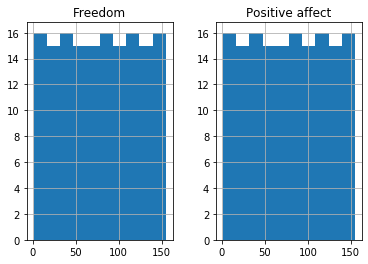

In [4]:
%%time
# Это нормальное распределение
df[ ['Freedom', 'Positive affect'] ].hist()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [5]:
%%time
# Для удобства
f = df['Freedom']

# Так как у нас есть выбросы, уберем их
f = f.fillna(method='ffill')

print(f'Медиана равна {statistics.median(f)}')
print(f'Мода равна {statistics.mode(f)}')
print(f'Математическое ожидание равно {round(statistics.mean(f),2)}')
print(f'Стандартное отклонение равно {round(statistics.pstdev(f),2)}')
print(f'Дисперсия равна {round(statistics.pvariance(f),2)}')
print(f'Минимум равен {min(f)}')
print(f'Максимум равен {max(f)}')
print(f'Размах равен {max(f)-min(f)}')

Медиана равна 77.5
Мода равна 68.0
Математическое ожидание равно 77.94
Стандартное отклонение равно 44.61
Дисперсия равна 1989.8
Минимум равен 1.0
Максимум равен 155.0
Размах равен 154.0
Wall time: 3 ms


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Wall time: 14 ms


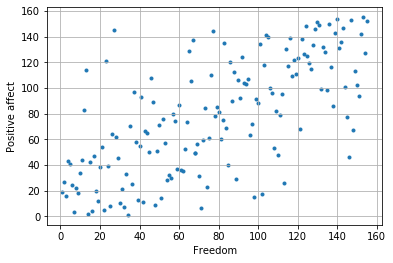

In [6]:
%%time
# x = [i for i in range(0, len(f))]
x = f
y = df['Positive affect'].fillna(method='ffill')

plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.grid(True)
plt.scatter(x, y, marker='.')

In [7]:
%%time
corr, p_value = pearsonr(x, y)
print('Коэффициент корреляции Пирсона:', corr)
print('Прослеживается взаимосвязь между элементами')

Коэффициент корреляции Пирсона: 0.6816719375536687
Прослеживается взаимосвязь между элементами
Wall time: 0 ns


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [8]:
%%time
# Вычитаем из каждого элемента среднее
f_n = f - statistics.mean(f)

# Для контроля
print(statistics.mean(f_n))

# нормализуем
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

f_n_2 = min_max_scaler.fit_transform(np.array(f_n).reshape(-1, 1))
print(min(f_n_2))
print(max(f_n_2))


5.101332461867386e-15
[-1.]
[1.]
Wall time: 392 ms


Построить матрицу корреляций для всех колонок таблицы

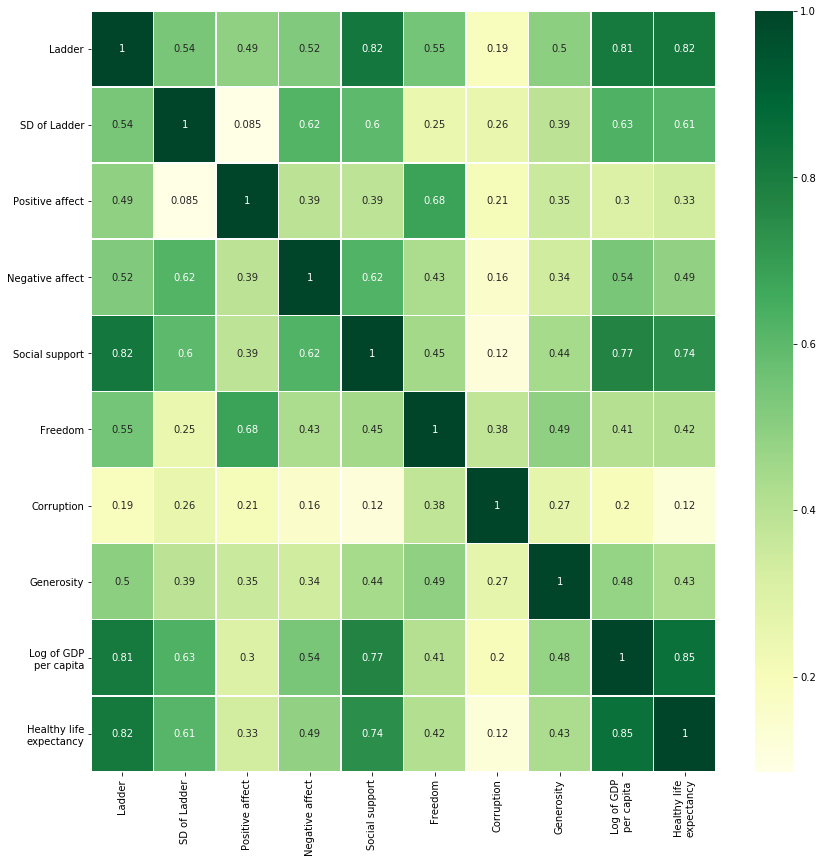

Wall time: 544 ms


In [9]:
%%time
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='YlGn',linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(14,14)
plt.show()

Загрузить следующую таблицу: 

In [10]:
%%time
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

Wall time: 1.35 s


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

Wall time: 24.6 ms


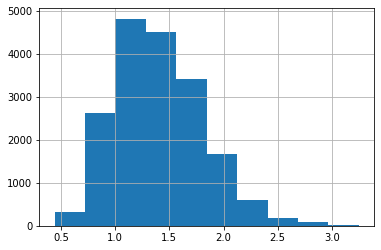

In [11]:
%%time
# Это распределение Гаусса(немного смещенное)
df['AveragePrice'].hist()

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [12]:
%%time
x = df['4046']
y = df['AveragePrice']


Wall time: 0 ns


Wall time: 49 ms


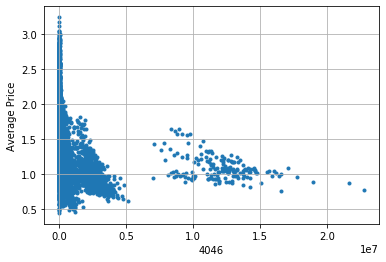

In [13]:
%%time

# Посмотрим на графические данные - мало что понятно

plt.xlabel('4046')
plt.ylabel('Average Price')
plt.grid(True)
# plt.scatter(y, x, marker='.')
plt.scatter(x, y, marker='.')

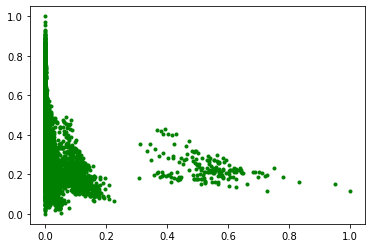

Wall time: 160 ms


In [14]:
%%time
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[ ['4046', 'AveragePrice'] ])
df_norm = pd.DataFrame(np_scaled)


plt.plot(df_norm[0], df_norm[1], 'g.')
plt.show()

In [15]:
corr, p_value = pearsonr(df_norm[0], df_norm[1])
print(corr)
print('Видна небольшая обратная связь между параметрами (больше корелляции видно на отдельном сгустке точек, которые идут после 0,4 по оси Х)')

-0.2083170484878848
Видна небольшая обратная связь между параметрами (больше корелляции видно на отдельном сгустке точек, которые идут после 0,4 по оси Х)
